In [1]:
import pybroker as pb
from pybroker import ExecContext
def buy_with_stop_loss(ctx:ExecContext):
    # 获取当前持有的股票头寸
    pos=ctx.long_pos()
    if not pos:
        # 设置全仓购买
        ctx.buy_shares=ctx.calc_target_shares(pb.param(name="percent"))
        ctx.hold_bars=100
    else:
        ctx.sell_shares=pos.shares
        # 设置止盈百分比,根据这个百分比自动卖出
        ctx.stop_profit_pct=pb.param(name="stop_profit_pct")
        

In [2]:
stock_code="600900"
start_date="20181026"
end_date="20241104"

Loading bar data...
Loaded bar data: 0:00:01 

Backtesting: 2018-10-26 00:00:00 to 2024-11-04 00:00:00

Loading bar data...
Loaded bar data: 0:00:00 

Test split: 2018-10-26 00:00:00 to 2024-11-04 00:00:00


  0% (0 of 1450) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--
  4% (61 of 1450) |                      | Elapsed Time: 0:00:00 ETA:   0:00:01
  9% (131 of 1450) |#                    | Elapsed Time: 0:00:00 ETA:   0:00:01
 14% (211 of 1450) |###                  | Elapsed Time: 0:00:00 ETA:   0:00:00
 19% (281 of 1450) |####                 | Elapsed Time: 0:00:00 ETA:   0:00:00
 25% (371 of 1450) |#####                | Elapsed Time: 0:00:00 ETA:   0:00:00
 31% (461 of 1450) |######               | Elapsed Time: 0:00:00 ETA:   0:00:00
 38% (551 of 1450) |#######              | Elapsed Time: 0:00:00 ETA:   0:00:00
 43% (631 of 1450) |#########            | Elapsed Time: 0:00:00 ETA:   0:00:00
 49% (721 of 1450) |##########           | Elapsed Time: 0:00:00 ETA:   0:00:00
 55% (811 of 1450) |###########          | Elapsed Time: 0:00:00 ETA:   0:00:00
 61% (891 of 1450) |############         | Elapsed Time: 0:00:00 ETA:   0:00:00
 67% (981 of 1450) |##############      


Finished backtest: 0:00:08
总回报率表现优异，说明投资策略的有效性很高；
最大回撤（百分比）控制得当，风险管理良好，投资策略相对稳健；
胜率表现良好，略高于50%，显示出一定的优势；
夏普比率略低，接近0，表明风险调整后收益一般，需关注风险控制；
交易次数非常高，策略非常活跃，但需注意控制交易成本；
总手续费较低，有助于提高净收益，表明交易成本控制得当；
索提诺比率略低，接近0，表明下行风险调整后的收益一般，需关注风险控制；
卡尔玛比率未知，无法评估收益与最大回撤的关系；
盈亏比良好，超过1，说明盈利大于亏损，策略总体表现积极；
溃疡指数表现良好，低于5，表明投资组合的下行风险较低；
净值R²较低，处于0.2到0.5之间，表明投资组合的表现与基准的相关性较弱；



,zh_name,name,value
5,总回报率,total_return_pct,23.03
10,最大回撤（百分比）,max_drawdown_pct,-16.28
11,胜率,win_rate,51.86
25,最大盈利交易（百分比）,largest_win_pct,4.22
28,最大亏损交易（百分比）,largest_loss_pct,-4.27
32,夏普比率,sharpe,0.02
34,盈亏比,profit_factor,1.06
0,交易次数,trade_count,724.00
1,初始市值,initial_market_value,500000.00
2,期末市值,end_market_value,617332.11


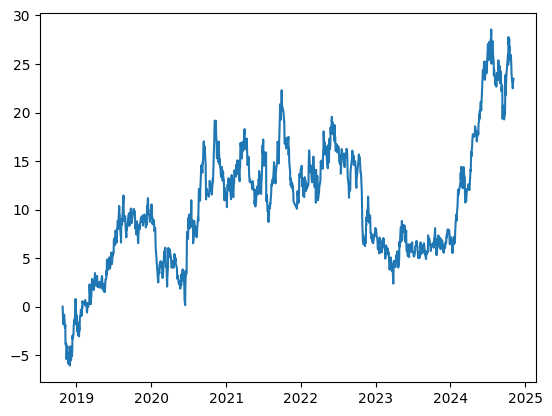

In [3]:
from unittest import result
import akshare
import pybroker as pb
from pybroker.scope import StaticScope as static
from pybroker import Strategy,StrategyConfig,YFinance,ExecContext
# pb.enable_data_source_cache('a_strategy')
from pybroker.ext.data import AKShare

import plot_utils
pb.param(name="stock_code",value="600900")
# 设置持仓比例为100%
static.instance().param(name="percent",value=1)
# 设置止损比例为10%
pb.param(name="stop_loss_pct",value="10")
# 设置止盈比例为10%
pb.param(name="stop_profit_pct",value="10")
akshare=AKShare()
df=akshare.query(symbols=[pb.param(name="stock_code")],start_date=start_date,end_date=end_date,adjust="hfq")
my_config=pb.StrategyConfig(initial_cash=500000)
strategy=Strategy(akshare,start_date=start_date,end_date=end_date,config=my_config)
strategy.add_execution(fn=buy_with_stop_loss,symbols=[pb.param(name="stock_code")])
result=strategy.backtest()
# import plot_utils
df=plot_utils.printResult(result.metrics_df.round(2))
plot_utils.plotChart(result)
df

In [66]:
buy_signals = result.orders[result.orders['type'] == 'buy']
sell_signals = result.orders[result.orders['type'] == 'sell']
buy_signals

,type,symbol,date,shares,limit_price,fill_price,fees
id,,,,,,,
1,buy,600900,2018-10-29,31230,NaN,15.89,0.0
3,buy,600900,2018-10-31,31610,NaN,15.61,0.0
5,buy,600900,2018-11-02,31753,NaN,15.49,0.0
7,buy,600900,2018-11-06,31897,NaN,15.19,0.0
9,buy,600900,2018-11-08,32318,NaN,15.14,0.0
...,...,...,...,...,...,...,...
1441,buy,600900,2024-10-23,22359,NaN,28.16,0.0
1443,buy,600900,2024-10-25,22311,NaN,27.74,0.0
1445,buy,600900,2024-10-29,22247,NaN,27.69,0.0


In [71]:
import plotly.graph_objects as go

# 假设 result 是你获得的回测对象
# 提取市场价值数据
syl = result.portfolio['syl']
# 提取交易记录
buy_signals = result.orders[result.orders['type'] == 'buy']
sell_signals = result.orders[result.orders['type'] == 'sell']
# 创建图表
fig = go.Figure()

# 添加市场价值线图
fig.add_trace(go.Scatter(
    x=result.portfolio.index,
    y=syl,
    mode='lines+markers',
    name='收益率',
    line=dict(shape='spline')
))

# 添加买入点
fig.add_trace(go.Scatter(
    x=buy_signals['date'],  # 买入的日期
    y=result.portfolio.loc[buy_signals['date'], 'syl'],  # 买入时的市场价值
    mode='markers',
    name='买单',
    marker=dict(color='red', size=10, symbol='triangle-up'),
    # 为每个买入点生成提示信息，显示具体的日期和买入价格
    text=buy_signals["fill_price"],
    textposition='top center'
))


# 添加卖出点
fig.add_trace(go.Scatter(
    x=sell_signals.date,  # 卖出的日期
    y=result.portfolio.loc[sell_signals.date,"syl"],  # 卖出的价格
    mode='markers',
    name='卖单1',
    marker=dict(color='green', size=10, symbol='triangle-down'),
    text=sell_signals["fill_price"],  # 提示信息
    textposition='bottom center'
))

# 添加标题和标签
fig.update_layout(
    title='收益率和买卖订单',
    xaxis_title='时间',
    yaxis_title='收益率',
    template='plotly_white',
       xaxis=dict(
            showspikes=True,
            spikecolor="blue",
            spikemode="across",
            spikethickness=1
        ),
        yaxis=dict(
            showspikes=True,
            spikecolor="blue",
            spikethickness=1
        ),
        hovermode="x unified"
    
)

# 展示图表
fig.show()
plot_utils.oneKeyPlot(stock_code,start_date,end_date)

长江电力
